In [1]:
import sys
sys.path.append('..')
from backtester import matlab, backtester
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline

In [3]:
d, info = matlab.loaddata('../mat/strategy_270225.mat')

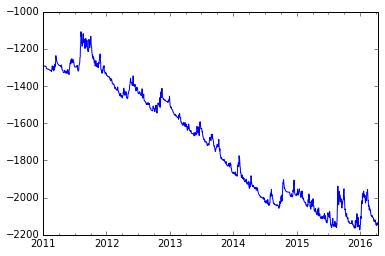

In [4]:
d.exo.plot();

In [10]:
info

{'legs': 4,
 'name': 'BearishCollarBrokenWing',
 'pcf': array([1, 2, 0, 1], dtype=uint8),
 'pcfqty': array([-1, -1,  1,  1], dtype=int16),
 'tickincrement': 0.25,
 'tickvalue': 12.5,
 'underlying': 'EP'}

<h1>Simple entry and exit rules based on new month</h1>

In [ ]:

month = pd.Series(d.index.month, index=d.index)

short_entry = month != month.shift()

# Close position 3 days before new month
# this is a future reference, only for test purposes
short_exit = month != month.shift(-3) 


<h1>Backtest results</h2>

In [7]:
direction = -1
pl, inposition = backtester.backtest(d, short_entry, short_exit, direction )
equity, stats = backtester.stats(pl, inposition)

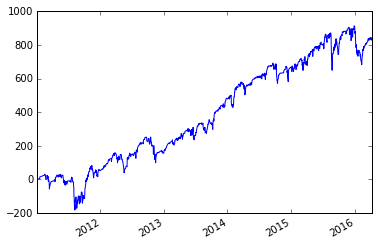

In [8]:
equity.plot()

In [9]:
stats

{'avg': 13.005468749999963,
 'count': 64,
 'maxdd': -230.19999999999982,
 'netprofit': 832.34999999999764,
 'std': 51.127438142647769,
 'winrate': 0.59375}